# Progetto Finale Data Science - Travel

**Il tuo compito sarà seguire ogni punto e commentarlo, mostrandomi di aver capito cosa tu stia facendo. Se alcuni punti si rivelano impossibili spiegami la motivazione. Troverai probabilmente alcuni modelli o tecniche che non hai propriamente studiato. Non preoccuparti, la sperimentazione, la scoperta e il continuo aggiornamento fanno parte del gioco. CANCELLA QUESTO MESSAGGIO PRIMA DI CARICARE IL PROGETTO**

In questo progetto si analizzerà un dataset sulla soddisfazione dei clienti di una compagnia aerea.

l'obiettivo è **poter prevedere la soddisfazione degli utenti in base a dei parametri sulla soddisfazione dei servizi della compagnia aerea**

## EDA (Exploratory data analysis)

### EXPLORATORY ANALYSIS

in questo progetto verrano caricati due dataset, uno per il training ed uno per il test, fornito dalla traccia su start2impact:

saranno caricati tutte le librerie python che verranno utilizzate in questo progetto:

In [2]:
import pandas as pd
from google.colab import files
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display


pd.set_option('display.max_columns', None)



S'importa i due csv forniti dalla traccia su start2impact. E' stato utilizzato il codice sotto perchè per la creazione del progetto è stato utilizzato con la piattaforma cloud di google Colab:

In [3]:
uploaded = files.upload()

Saving train.csv to train (1).csv
Saving test.csv to test (1).csv


In [4]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [5]:
df_train.shape, df_test.shape

((103904, 25), (25976, 25))

si puoi analizzare che sommando la grandezza dei 2 dataset, il training set rappresenta il 80% dei dati mentre il training set rappresenta il 20% dei dati.

Viene dato un primo sguardo ai dati del dataset di training

In [6]:
display(df_train.head(), df_test.head())

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [7]:
display(df_train.info(), df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

None

None

Si può osservare che il dataset è composto da 25 variabili (incluso il target chiamato *satisfaction*) diviso in:
1. 5 variabili categoriche (compreso il target)
2. 20 variabili numeriche

Tra le variabili numeriche, tutte sono di tipo intero tranne la variabile 'Arrival Delay in Minutes'. analizzando i primi valori, nel passo precedente, non sembra esserci numeri decimali, nella fase di feature engineering si potrebbe fare una piccola analisi su questa variabile e poterla cambiare. Trasformarla ad intero può aiutare ad avere una chiarezza dei dati, inoltre, dal nome della variabile si evince che i valori inseriti sono minuti, quindi è improbabile che venga inserito un valore decimale se si registrano solo i minuti di ritardo dell'arrivo dell'aereo

viene dato uno sguardo alle colonne presenti:

In [8]:
display(df_train.columns, df_test.columns)

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

viene dato uno sguardo ai valori unici presenti in ogni colonna:

In [9]:
display(df_train.nunique())
display("valori unici nel test set: ")
display(df_test.nunique())



Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

'valori unici nel test set: '

Unnamed: 0                           25976
id                                   25976
Gender                                   2
Customer Type                            2
Age                                     75
Type of Travel                           2
Class                                    3
Flight Distance                       3281
Inflight wifi service                    6
Departure/Arrival time convenient        6
Ease of Online booking                   6
Gate location                            5
Food and drink                           6
Online boarding                          6
Seat comfort                             5
Inflight entertainment                   6
On-board service                         6
Leg room service                         6
Baggage handling                         5
Checkin service                          5
Inflight service                         6
Cleanliness                              6
Departure Delay in Minutes             313
Arrival Del

In [10]:
for column in df_train.columns:
    unique_value = df_train[column].unique()
    print(f"Valori presenti nella variabile '{column}' unici: {unique_value}")

Valori presenti nella variabile 'Unnamed: 0' unici: [     0      1      2 ... 103901 103902 103903]
Valori presenti nella variabile 'id' unici: [ 70172   5047 110028 ...  68825  54173  62567]
Valori presenti nella variabile 'Gender' unici: ['Male' 'Female']
Valori presenti nella variabile 'Customer Type' unici: ['Loyal Customer' 'disloyal Customer']
Valori presenti nella variabile 'Age' unici: [13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
Valori presenti nella variabile 'Type of Travel' unici: ['Personal Travel' 'Business travel']
Valori presenti nella variabile 'Class' unici: ['Eco Plus' 'Business' 'Eco']
Valori presenti nella variabile 'Flight Distance' unici: [ 460  235 1142 ...  974 1479  400]
Valori presenti nella variabile 'Inflight wifi service' unici: [3 2 4 1 5 0]
Valori presenti nella variabile 

Questa analisi evidenzia una vasta gamma di valori nel dataset, che variano da 0 a 1500. Inoltre, si osserva una notevole disparità nei valori delle diverse variabili, ad esempio, 'Arrival Delay in Minutes' e 'Seat comfort' presentano valori molto diversi tra loro. Nei successivi step si implementeranno delle soluzioni di standardizzazione delle variabili

Nell'analisi dei valori unici delle variabili, nello step precedente e questa analisi,  si osserva che numerose variabili:

1. Inflight wifi service                    
2. Departure/Arrival time convenient        
3. Ease of Online booking                   
4. Gate location                            
5. Food and drink                           
6. Online boarding                          
7. Seat comfort                             
8. Inflight entertainment                   
9. On-board service                         
10. Leg room service                         
11. Baggage handling                         
12. Checkin service                          
13. Inflight service                         
14. Cleanliness

presentano valori compresi tra 0 e 5. Questi valori sembrano rappresentare le valutazioni dei servizi offerti dalla compagnia aerea, dal cibo e bibite offerte, dalla comodità dei sedili, dalla pulizia alla facilità della prenotazione online. Si potrebbe considerare la possibilità di sintetizzare queste variabili in un'unica misura che rifletta l'esperienza complessiva del cliente con i servizi della compagnia aerea.

Si analizzano le variabili categoriche:

In [11]:
for column in df_train.columns:
    unique_value = df_train[column].unique()
    if df_train[column].dtype == 'object':
      print(f"Valori presenti nella variabile '{column}' unici: {unique_value}")

Valori presenti nella variabile 'Gender' unici: ['Male' 'Female']
Valori presenti nella variabile 'Customer Type' unici: ['Loyal Customer' 'disloyal Customer']
Valori presenti nella variabile 'Type of Travel' unici: ['Personal Travel' 'Business travel']
Valori presenti nella variabile 'Class' unici: ['Eco Plus' 'Business' 'Eco']
Valori presenti nella variabile 'satisfaction' unici: ['neutral or dissatisfied' 'satisfied']


Ad eccezione della variabile target satisfaction, analizziamo le variabili categoriche in cui esiste una relazione d'ordine. La più ovvia è la variabile 'Class', dove si può presumere che Eco < Eco Plus < Business. Le restanti sono variabili categoriche nominali, cioè variabili distinte senza un significato intrinseco nell'ordinare le categorie. Nei successivi step si implementeranno delle tecniche che trasformano le variabili categoriche ordinali e nominali in forma numerica perchè può migliorare le prestazione del modello di apprendimento fornendo maggiori informazioni sulle variabili categoriche e può aiutare a evitare il problema dell'ordinalità, che potrebbe verificarsi in questo progetto con la variabile *Class*

Si controlla se il dataset è bilanciato:

<Axes: xlabel='satisfaction', ylabel='count'>

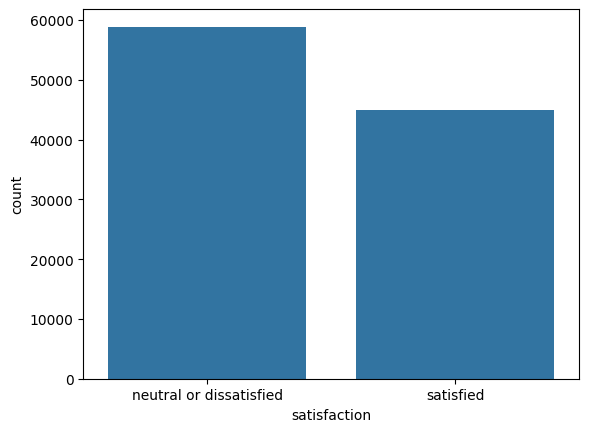

In [12]:
sns.countplot(df_train, x="satisfaction")

<Axes: xlabel='satisfaction', ylabel='count'>

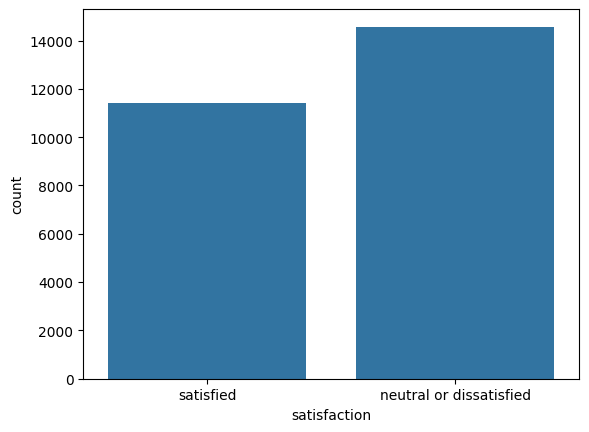

In [13]:
sns.countplot(df_test, x="satisfaction")


### DATA PREPROCESSING

Dopo aver dato un primo sguardo al dataset, si può proseguire con il data cleaning:

In questa fase verranno applicate modifiche sia al training che al test set, quindi su tutto il dataset, per vari motivi:
1.  **Errate interpretazioni delle relazioni tra variabili**: La presenza di dati sporchi o mancanti nel training set può portare a distorcere le relazioni tra le variabili.

2.   **Visualizzazioni fuorvianti**: Dati non puliti possono generare grafici che non riflettono accuratamente le distribuzioni e le tendenze reali dei dati, portando a interpretazioni errate.

3.   **Destabilizzazione dei modelli**: Dati sporchi possono compromettere la stabilità dei modelli di apprendimento. Questo può portare a overfitting (modello troppo complesso che si adatta ai rumori del training set) o underfitting (modello troppo semplice che non cattura i pattern dei dati), riducendo la robustezza e la capacità di generalizzazione dei modelli (MOLTO PROBABILMENTE VERRà TOLTA QUESTA PARTE)

# PER IL MOMENTO NON CANCELLARE QUESTO TESTO PIU' IL TESTO INERENTE AL TEST SET, QUANDO UTILIZZERAI IL TEST SET PER FARE LA PREDIZIONE CAPISCI SE FUNZIONA








#### DATA REDUCTION

Si procede a eliminare le variabili non indispensabili o ridondanti in tutto il dataset come:

1. **Unnamed: 0**: Questa variabile assegna un ID a ogni riga. Tuttavia, utilizzando pandas, viene automaticamente creato un indice per ogni riga, rendendo questa variabile ridondante.
2. **id**: Questa variabile non è indispensabile per il progetto, in quanto non contribuisce all'analisi o alla costruzione del modello



In [14]:
df_train_feat_clean= df_train.drop(columns=["Unnamed: 0", "id"], axis=1)
df_test_feat_clean= df_test.drop(columns=["Unnamed: 0", "id"], axis=1)

df_train_feat_clean

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [15]:
df_test_feat_clean

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


### DATA CLEANING (DEVI CANCELLARE IL TITOLO DI SOPRA)

Si procede ad analizzare se sono presenti dei valori nulli (isnull()) o NaN (isna()), verrà effettuato un calcolo in percentuale per fare più chiarezza sui dati mancanti:

s'inizia con il test set :

In [16]:
def calculate_null_percentage(df):
  nan_df = (df.isna().sum() / len(df) ) * 100
  null_df = (df.isnull().sum() / len(df) ) * 100
  return nan_df, null_df

In [17]:
nan_df_test, null_df_test =  calculate_null_percentage(df_test_feat_clean)

nan_df_test, null_df_test


(Gender                               0.000000
 Customer Type                        0.000000
 Age                                  0.000000
 Type of Travel                       0.000000
 Class                                0.000000
 Flight Distance                      0.000000
 Inflight wifi service                0.000000
 Departure/Arrival time convenient    0.000000
 Ease of Online booking               0.000000
 Gate location                        0.000000
 Food and drink                       0.000000
 Online boarding                      0.000000
 Seat comfort                         0.000000
 Inflight entertainment               0.000000
 On-board service                     0.000000
 Leg room service                     0.000000
 Baggage handling                     0.000000
 Checkin service                      0.000000
 Inflight service                     0.000000
 Cleanliness                          0.000000
 Departure Delay in Minutes           0.000000
 Arrival Dela

È emerso che valori nulli o NaN sono presenti solo nella variabile *Arrival Delay in Minutes* e rappresentano quasi lo **0.32%** dei valori NaN e nulli, percentuali veramente basse

si analizza il training set:

In [18]:
nan_df_train, null_df_train =  calculate_null_percentage(df_train_feat_clean)

nan_df_train, null_df_train

(Gender                               0.000000
 Customer Type                        0.000000
 Age                                  0.000000
 Type of Travel                       0.000000
 Class                                0.000000
 Flight Distance                      0.000000
 Inflight wifi service                0.000000
 Departure/Arrival time convenient    0.000000
 Ease of Online booking               0.000000
 Gate location                        0.000000
 Food and drink                       0.000000
 Online boarding                      0.000000
 Seat comfort                         0.000000
 Inflight entertainment               0.000000
 On-board service                     0.000000
 Leg room service                     0.000000
 Baggage handling                     0.000000
 Checkin service                      0.000000
 Inflight service                     0.000000
 Cleanliness                          0.000000
 Departure Delay in Minutes           0.000000
 Arrival Dela

Anche nel training set, la variabile *Arrival Delay in Minutes* è l'unica variabile che ha valori nulli o NaN, i quali rappresentano quasi lo **0.30%** dei valori, una percentuale alquanto bassa. Si analizzano righe con valori nulli:

In [19]:

null_value = df_test_feat_clean.isna()
df_test_missing_val = df_test_feat_clean[null_value.any(axis=1)]

null_value = df_train_feat_clean.isna()
df_train_missing_val = df_train_feat_clean[null_value.any(axis=1)]

display(df_test_missing_val, df_train_missing_val)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
516,Female,Loyal Customer,21,Personal Travel,Eco,632,1,5,1,4,2,1,4,2,4,2,5,4,5,2,9,NaN,neutral or dissatisfied
656,Male,Loyal Customer,9,Personal Travel,Eco,762,2,5,2,2,4,2,1,4,2,5,2,5,2,4,51,NaN,neutral or dissatisfied
1071,Male,disloyal Customer,25,Business travel,Eco,1017,3,4,4,5,5,4,5,5,2,5,2,3,2,5,126,NaN,neutral or dissatisfied
1224,Male,Loyal Customer,7,Personal Travel,Eco,399,4,5,4,4,4,4,4,4,4,3,1,1,4,4,0,NaN,neutral or dissatisfied
1589,Female,Loyal Customer,58,Business travel,Eco,129,5,3,3,3,3,5,5,5,5,5,5,3,5,5,3,NaN,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24072,Male,Loyal Customer,45,Business travel,Eco,352,5,1,1,1,5,5,5,5,1,1,1,3,2,5,26,NaN,satisfied
24133,Female,Loyal Customer,29,Business travel,Business,3873,3,3,3,3,3,3,3,3,3,4,4,4,3,3,19,NaN,neutral or dissatisfied
24301,Male,disloyal Customer,38,Business travel,Business,759,3,3,3,1,4,3,4,4,3,3,5,5,4,4,0,NaN,satisfied
25128,Female,Loyal Customer,52,Business travel,Business,3659,5,5,5,5,2,4,5,5,5,5,5,3,5,3,0,NaN,satisfied


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,5,5,5,5,5,2,4,1,1,5,31,NaN,satisfied
1124,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,4,3,4,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,2,4,3,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,2,3,2,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,5,2,5,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,3,2,3,3,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,3,3,3,3,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,1,5,1,3,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,1,5,4,5,5,1,5,5,5,3,5,0,NaN,satisfied


È emerso che i valori nulli sono pochi rispetto al numero totale di valori nella variabile, sia nel training set che nel test set. Pertanto, si potrebbe considerare l'eliminazione delle righe contenenti valori nulli in entrambi i dataset, poiché la perdita di dati non influenzerebbe in modo significativo l'integrità dei dataset. Si utilizzerà il metodo *dropna()* su entrambi i dataset:

In [20]:
df_train_clean = df_train_feat_clean.dropna()
df_test_clean = df_test_feat_clean.dropna()


Si effettua una controprova per stabilire che tutti i valori nulli sono stati eliminati:

In [21]:
nan_df_test, null_df_test =  calculate_null_percentage(df_test_clean)
nan_df_test, null_df_test

(Gender                               0.0
 Customer Type                        0.0
 Age                                  0.0
 Type of Travel                       0.0
 Class                                0.0
 Flight Distance                      0.0
 Inflight wifi service                0.0
 Departure/Arrival time convenient    0.0
 Ease of Online booking               0.0
 Gate location                        0.0
 Food and drink                       0.0
 Online boarding                      0.0
 Seat comfort                         0.0
 Inflight entertainment               0.0
 On-board service                     0.0
 Leg room service                     0.0
 Baggage handling                     0.0
 Checkin service                      0.0
 Inflight service                     0.0
 Cleanliness                          0.0
 Departure Delay in Minutes           0.0
 Arrival Delay in Minutes             0.0
 satisfaction                         0.0
 dtype: float64,
 Gender          

In [22]:
nan_df_train, null_df_train =  calculate_null_percentage(df_test_clean)

nan_df_train, null_df_train

(Gender                               0.0
 Customer Type                        0.0
 Age                                  0.0
 Type of Travel                       0.0
 Class                                0.0
 Flight Distance                      0.0
 Inflight wifi service                0.0
 Departure/Arrival time convenient    0.0
 Ease of Online booking               0.0
 Gate location                        0.0
 Food and drink                       0.0
 Online boarding                      0.0
 Seat comfort                         0.0
 Inflight entertainment               0.0
 On-board service                     0.0
 Leg room service                     0.0
 Baggage handling                     0.0
 Checkin service                      0.0
 Inflight service                     0.0
 Cleanliness                          0.0
 Departure Delay in Minutes           0.0
 Arrival Delay in Minutes             0.0
 satisfaction                         0.0
 dtype: float64,
 Gender          

I due dataset sono completamente puliti dai valori nulli

### FEATURE ENGINEERING

In questa fase verranno eseguite le varie soluzioni pensate durante la fase di esplorazione dei dati. Le modifiche verranno apportate sia al training set che al test set per vari motivi:

1. **Coerenza dei dati**: Applicare le stesse trasformazioni (ad esempio, standardizzazione, encoding) sia al training set che al test set assicura che i dati abbiano le stesse caratteristiche. Se si applica il feature engineering solo al training set, il modello potrebbe non funzionare correttamente sul test set a causa delle differenze nei dati.
2. **Stabilità dei modelli**: Se il test set viene trasformato in modo diverso rispetto al training set, può compromettere la stabilità dei modelli di apprendimento. Questo può portare a overfitting (modello troppo complesso che si adatta ai rumori del training set) o underfitting (modello troppo semplice che non cattura i pattern dei dati), riducendo la robustezza e la capacità di generalizzazione dei modelli.

Verrà esclusa la variabile target *satisfaction* per vari motivi:
1. **Rischio di Data Leakage**:
L'inclusione della variabile target nel feature engineering può portare a data leakage, dove le informazioni sulla variabile target influenzano inavvertitamente le trasformazioni o le caratteristiche del training set, portando a una valutazione erroneamente ottimistica delle prestazioni del modello.
2. **Focus sulle Caratteristiche Predittive**:
La fase di feature engineering si concentra sulla manipolazione delle caratteristiche del training set per migliorare le prestazioni del modello. La variabile target non fa parte di queste caratteristiche, poiché è l'output che stiamo cercando di predire.

In [23]:
df_train_f_eng = df_train_clean.drop(['satisfaction'], axis='columns')
df_test_f_eng = df_test_clean.drop(['satisfaction'], axis='columns')

nella fase di esplorazione del dataset è stato notato che la variabile *Arrival Delay in Minutes* è l'unica variabile di tipo float64. Per poter effettuare la trasformazione in intero bisogna analizzare se i valori non abbiano valori decimali:

In [24]:
def check_decimal_values(column_check):
  unique_val_arrival_delay = column_check.unique()
  decimal_values, integer_parts = np.modf(unique_val_arrival_delay)
  is_decimal_values = unique_val_arrival_delay[decimal_values != 0]
  print(f"Valori con parte decimale non nulla: {is_decimal_values}")

check_decimal_values(df_train_f_eng['Arrival Delay in Minutes'])
check_decimal_values(df_test_f_eng['Arrival Delay in Minutes'])


Valori con parte decimale non nulla: []
Valori con parte decimale non nulla: []


Dal controllo si evince che non ci sono numeri con valori decimali in entrambi i dataset, quindi è possibile trasformarla in un tipo intero.

In [25]:
df_train_f_eng['Arrival Delay in Minutes'] = df_train_f_eng['Arrival Delay in Minutes'].astype(int)
df_test_f_eng['Arrival Delay in Minutes'] = df_test_f_eng['Arrival Delay in Minutes'].astype(int)

display(df_train_f_eng, df_test_f_eng)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0


Si continua con la trasformazione delle variabili categoriche ordinali e nominali in forma numerica. Per la variabile categorica ordinale, viene  utilizzato la classe *OrdinalEncoder*. Si tratta di una classe che trasforma la variabile categorica in forma numerica, in cui ogni label viene associata a un numero ordinale che parte da 0 e viene incrementato di 1.

Per la variabile categorica nominale, viene utilizzato la classe *OneHotEncoder*. Si tratta di una classe che crea una variabile numerica contenente valori binari (1 se non è prensente e 0 se non è presente) per ogni label presente nella variabile categorica. Attraverso le combinazioni di questi valori binari, vengono create matrici che spiegano le label della variabile.

Entrambi le classi hanno bisogno di un numpy array di default. Per evitare trasformazioni da array numpy a pandas dataframe, si utilizza la classe *ColumnTransformer*

In [26]:
categorical_features_ordinal = ['Class']
categorical_features_onehot = ['Customer Type', 'Gender', 'Type of Travel']

categories_order=['Eco','Eco Plus','Business']
categories = [('Customer Type',['Loyal Customer','disloyal Customer']),
              ('Gender',['Male','Female']),
              ('Type of Travel', ['Personal Travel', 'Business travel'])]

ohe_columns = [x[0] for x in categories]
ohe_categories = [x[1] for x in categories]

ohe_enc = OneHotEncoder(sparse_output=False, categories=ohe_categories)
transformer_ohe = make_column_transformer((ohe_enc, ohe_columns), remainder='passthrough')

transformed_ohe=transformer_ohe.fit_transform(df_train_f_eng)
df_train_f_eng_ohe = pd.DataFrame(
    transformed_ohe,
    columns=transformer_ohe.get_feature_names_out(),
    index=df_train_f_eng.index
)
df_test_f_eng_ohe = pd.DataFrame(
    transformer_ohe.transform(df_test_f_eng),
    columns=transformer_ohe.get_feature_names_out(),
    index=df_test_f_eng.index
)


or_enc = OrdinalEncoder(categories=[categories_order])
transformer_or = make_column_transformer((or_enc, ['remainder__Class']), remainder='passthrough')

transformed_or = transformer_or.fit_transform(df_train_f_eng_ohe)

df_train_f_eng_or = pd.DataFrame(
    transformed_or,
    columns=transformer_or.get_feature_names_out(),
    index=df_train_f_eng_ohe.index
)

df_test_f_eng_or = pd.DataFrame(
    transformer_or.transform(df_test_f_eng_ohe),
    columns=transformer_or.get_feature_names_out(),
    index=df_test_f_eng_ohe.index
)

display(df_train_f_eng_or, df_test_f_eng_or)

,ordinalencoder__remainder__Class,remainder__onehotencoder__Customer Type_Loyal Customer,remainder__onehotencoder__Customer Type_disloyal Customer,remainder__onehotencoder__Gender_Male,remainder__onehotencoder__Gender_Female,remainder__onehotencoder__Type of Travel_Personal Travel,remainder__onehotencoder__Type of Travel_Business travel,remainder__remainder__Age,remainder__remainder__Flight Distance,remainder__remainder__Inflight wifi service,remainder__remainder__Departure/Arrival time convenient,remainder__remainder__Ease of Online booking,remainder__remainder__Gate location,remainder__remainder__Food and drink,remainder__remainder__Online boarding,remainder__remainder__Seat comfort,remainder__remainder__Inflight entertainment,remainder__remainder__On-board service,remainder__remainder__Leg room service,remainder__remainder__Baggage handling,remainder__remainder__Checkin service,remainder__remainder__Inflight service,remainder__remainder__Cleanliness,remainder__remainder__Departure Delay in Minutes,remainder__remainder__Arrival Delay in Minutes
0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18
1,2.0,0.0,1.0,1.0,0.0,0.0,1.0,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6
2,2.0,1.0,0.0,0.0,1.0,0.0,1.0,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0
3,2.0,1.0,0.0,0.0,1.0,0.0,1.0,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9
4,2.0,1.0,0.0,1.0,0.0,0.0,1.0,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0.0,0.0,1.0,0.0,1.0,0.0,1.0,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0
103900,2.0,1.0,0.0,1.0,0.0,0.0,1.0,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0
103901,2.0,0.0,1.0,1.0,0.0,0.0,1.0,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14
103902,0.0,0.0,1.0,0.0,1.0,0.0,1.0,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0


,ordinalencoder__remainder__Class,remainder__onehotencoder__Customer Type_Loyal Customer,remainder__onehotencoder__Customer Type_disloyal Customer,remainder__onehotencoder__Gender_Male,remainder__onehotencoder__Gender_Female,remainder__onehotencoder__Type of Travel_Personal Travel,remainder__onehotencoder__Type of Travel_Business travel,remainder__remainder__Age,remainder__remainder__Flight Distance,remainder__remainder__Inflight wifi service,remainder__remainder__Departure/Arrival time convenient,remainder__remainder__Ease of Online booking,remainder__remainder__Gate location,remainder__remainder__Food and drink,remainder__remainder__Online boarding,remainder__remainder__Seat comfort,remainder__remainder__Inflight entertainment,remainder__remainder__On-board service,remainder__remainder__Leg room service,remainder__remainder__Baggage handling,remainder__remainder__Checkin service,remainder__remainder__Inflight service,remainder__remainder__Cleanliness,remainder__remainder__Departure Delay in Minutes,remainder__remainder__Arrival Delay in Minutes
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,52,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44
1,2.0,1.0,0.0,0.0,1.0,0.0,1.0,36,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,20,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0
3,2.0,1.0,0.0,1.0,0.0,0.0,1.0,44,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,49,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,2.0,0.0,1.0,1.0,0.0,0.0,1.0,34,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0
25972,2.0,1.0,0.0,1.0,0.0,0.0,1.0,23,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0
25973,0.0,1.0,0.0,0.0,1.0,1.0,0.0,17,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0
25974,2.0,1.0,0.0,1.0,0.0,0.0,1.0,14,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0


si rinominano le colonne, modificate dalle classi per la modifica delle variabili categoriche

In [27]:
df_train_f_eng_or = df_train_f_eng_or.rename(columns={
    "ordinalencoder__remainder__Class": "Class",
    "remainder__onehotencoder__Customer Type_Loyal Customer": "Customer Type_Loyal Customer",
    "remainder__onehotencoder__Customer Type_disloyal Customer":"Customer Type_disloyal Customer",
    "remainder__onehotencoder__Gender_Male": "Gender_Male",
    "remainder__onehotencoder__Gender_Female": "Gender_Female",
    "remainder__onehotencoder__Type of Travel_Personal Travel": "Type of Travel_Personal Travel",
    "remainder__onehotencoder__Type of Travel_Business travel": "Type of Travel_Business travel",
    "remainder__remainder__Age": "Age",
    "remainder__remainder__Flight Distance": "Flight Distance",
    "remainder__remainder__Inflight wifi service": "Inflight wifi service",
    "remainder__remainder__Departure/Arrival time convenient": "Departure/Arrival time convenient",
    "remainder__remainder__Ease of Online booking": "Ease of Online booking",
    "remainder__remainder__Gate location": "Gate location",
    "remainder__remainder__Food and drink": "Food and drink",
    "remainder__remainder__Online boarding": "Online boarding",
    "remainder__remainder__Seat comfort": "Seat comfort",
    "remainder__remainder__Inflight entertainment": "Inflight entertainment",
    "remainder__remainder__On-board service": "On-board service",
    "remainder__remainder__Leg room service": "Leg room service",
    "remainder__remainder__Baggage handling": "Baggage handling",
    "remainder__remainder__Checkin service": "Checkin service",
    "remainder__remainder__Inflight service": "Inflight service",
    "remainder__remainder__Cleanliness": "Cleanliness",
    "remainder__remainder__Departure Delay in Minutes": "Departure Delay in Minutes",
    "remainder__remainder__Arrival Delay in Minutes": "Arrival Delay in Minutes"
    })

In [28]:
df_train_f_eng_or.columns


Index(['Class', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Gender_Male', 'Gender_Female',
       'Type of Travel_Personal Travel', 'Type of Travel_Business travel',
       'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

### DATA EXPLORATION


In questa fase verranno rintracciati gli **outliers**. Gli outliers sono dei dati diversi dagli altri che si discostano da una distribuzione generale di una variabile o di un insieme di variabili. Essi possono distorcere le stime dei parametri del modello di apprendimento e possono influenzare le statistiche descrittive (come la media e la deviazione standard) portando a interpretazioni errate dei dati.


Prima di iniziare ad analizzare il dataset, è necessario decidere quale dataset utilizzare o se utilizzare entrambi. In questa fase è stato deciso di utilizzare solo il training set perchè se si togliessero gli outliers anche nel test set, si creerebbe un accuretezza falsata perchè si creerebbe un test set ottimale e pulito, sovrastimando le prestazioni del modello, e l'obiettivo è lasciare i dati di test che assomigliano quanto possibile a quelli che si riceverebbero in un ambiente di produzione.

Gli outliers possono essere rintracciati sia da un punto di vista grafico o calcolarlo con i quartili recuperati dal metodo *describe()*. Verranno analizzati da un punto di vista grafico.

In [29]:
def create_boxplot(df_to_draw):
  df_show = pd.melt(df_to_draw, value_vars=['Class', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Gender_Male', 'Gender_Female',
       'Type of Travel_Personal Travel', 'Type of Travel_Business travel',
       'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'], var_name='var', value_name='val')

  fig, axs = plt.subplots(nrows=13, ncols=2, figsize=(16, 30))
  axs = axs.flatten()
  for i, ax in enumerate(axs):
      if i < len(df_to_draw.columns):
          sns.boxplot(data=df_show[df_show['var'] == df_to_draw.columns[i]], ax=ax)
          ax.set_title(df_to_draw.columns[i])
      else:
          ax.axis('off')

  plt.tight_layout()
  plt.show()

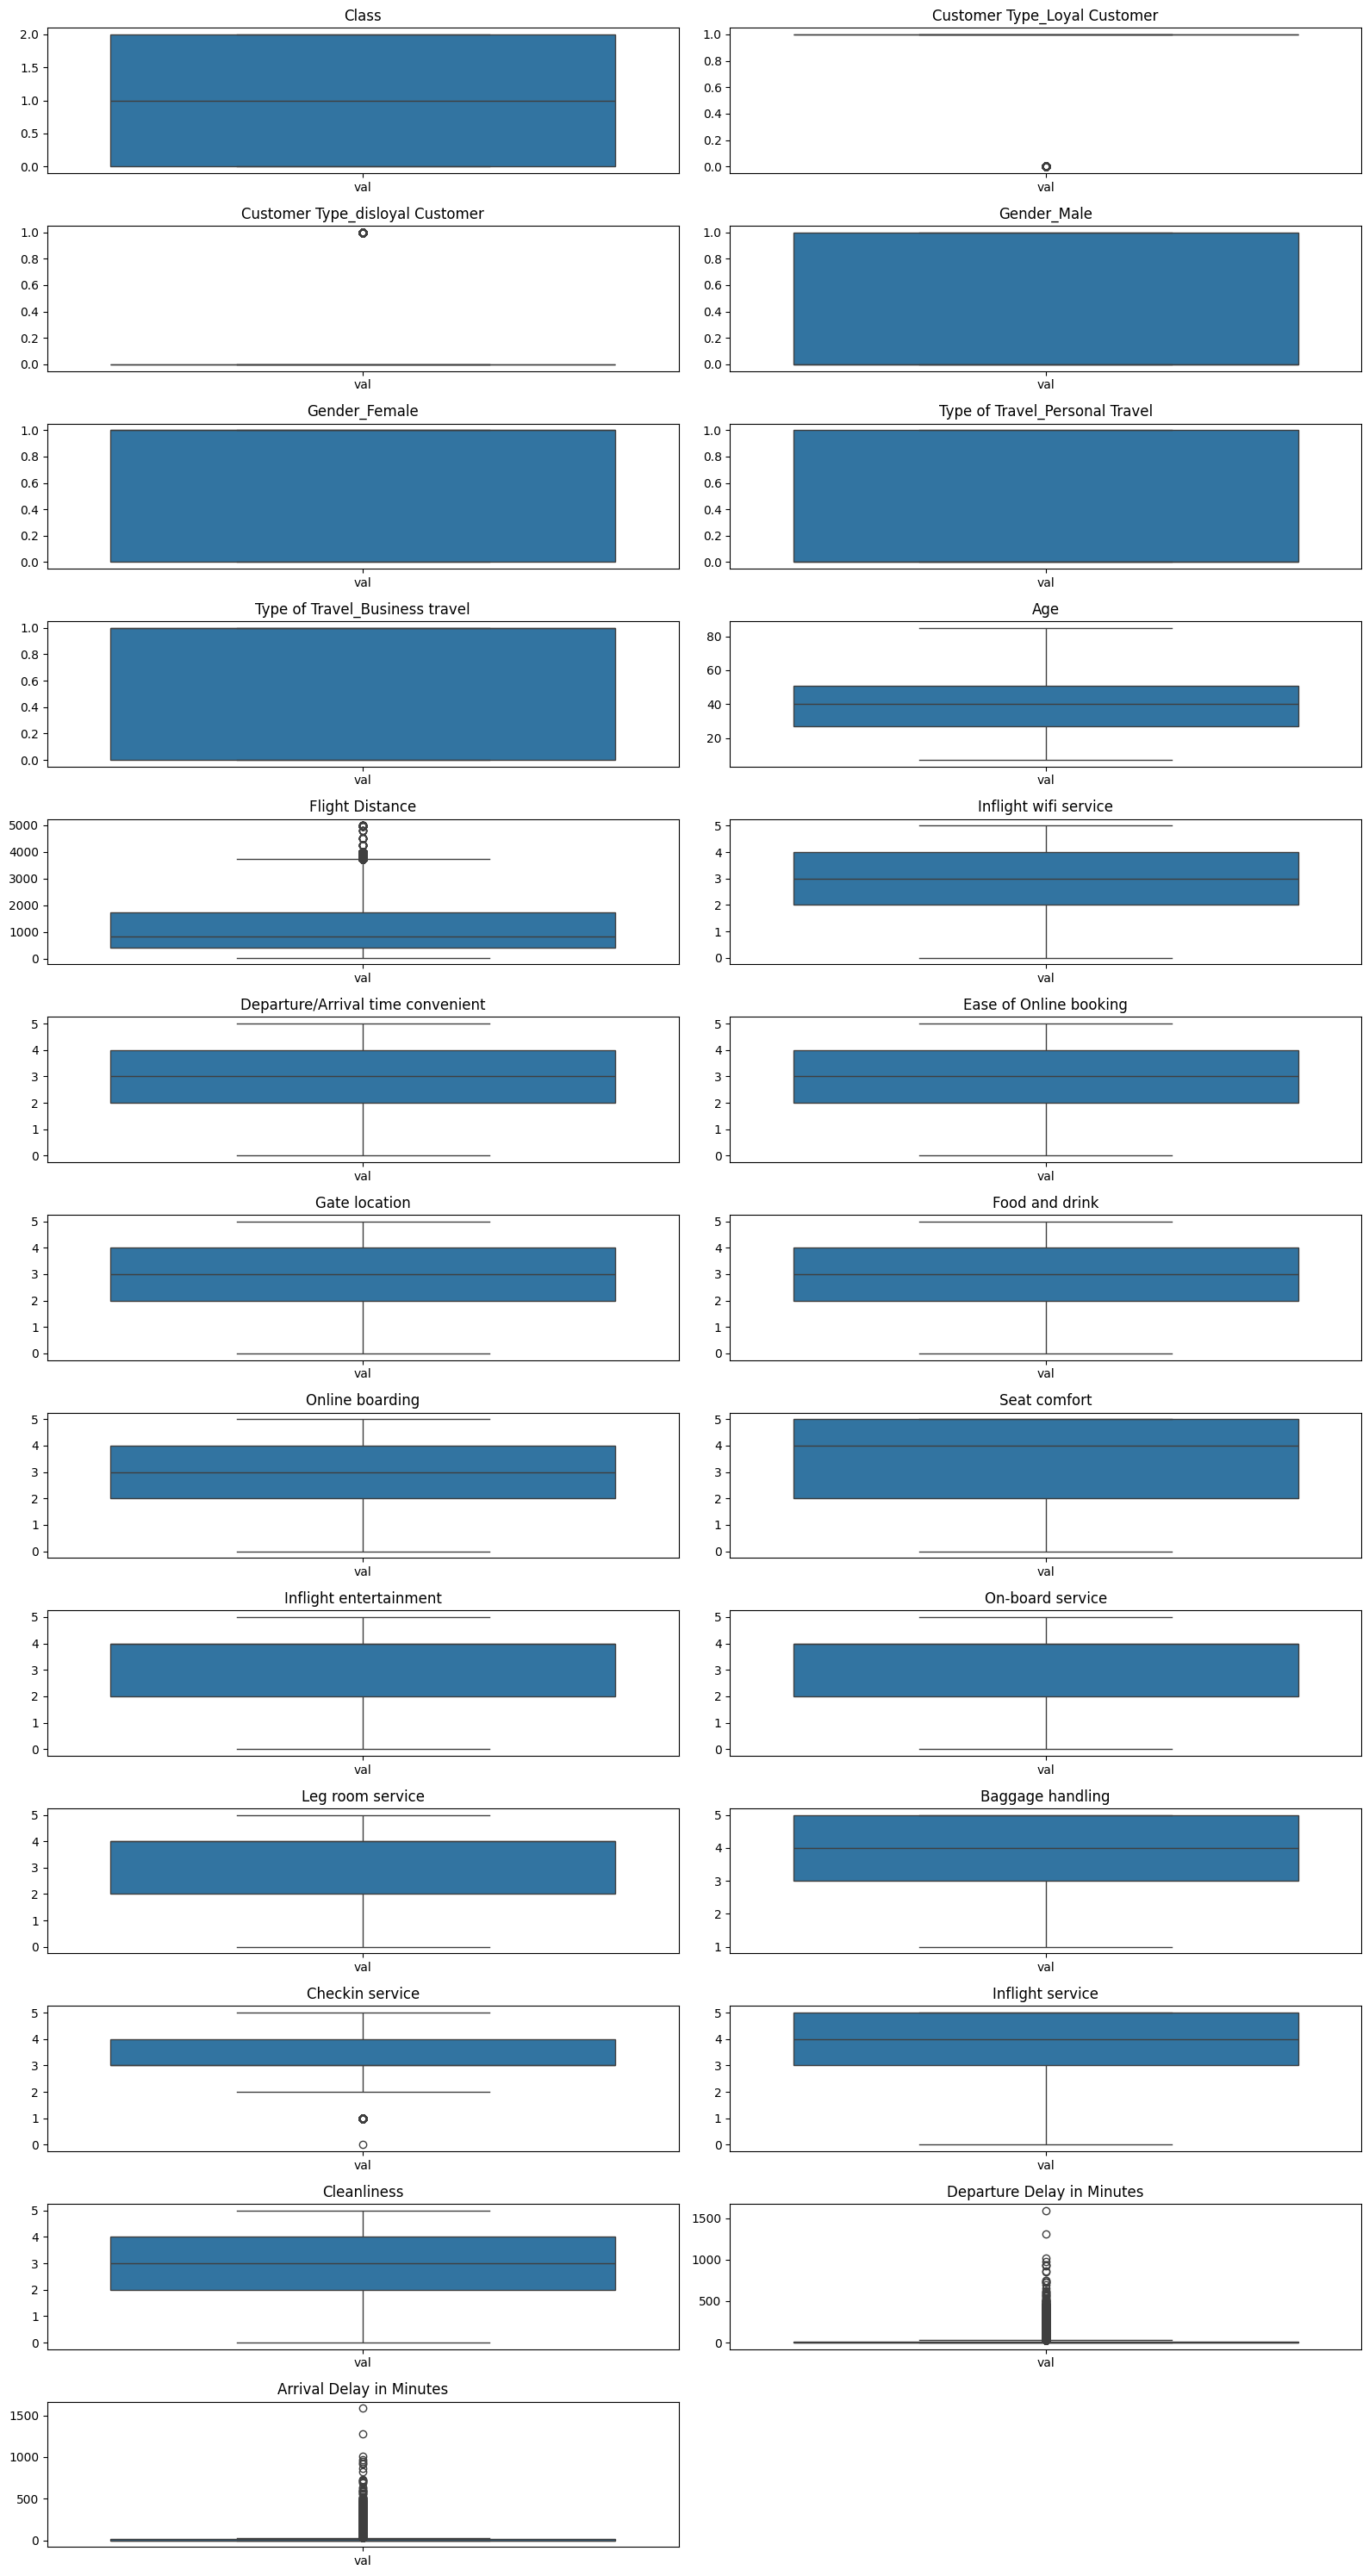

In [30]:
create_boxplot(df_train_f_eng_or)

Osservando i boxplot, in generale molte variabili non presentano dei outliers. le variabili che hanno degli outliers sono:


1.   Flight Distance
2.   Checkin Service
3. Customer Type_Loyal Customer
4. Customer Type_disloyal Customer

ma le variabili:
1. Departure Delay in Minutes
2. Arrival Delay in Minutes

sembrano esserci degli outliers ma viene visualizzato un boxplot in cui non è molto comprensibile, per riconoscere possibili outliers nelle variabili si utilizzerà un **rilevamento automatico di outliers** chiamato *Isolation Forest*. L'Isolation Forest è un metodo di sklearn che aiuta a rintracciare gli outliers attribuendo un punteggio. Questo algoritmo costruisce una foresta di alberi binari dove in ogni albero sceglie casualmente una variabile e la soglia di suddivisione che è compresa tra il massimo e il minimo della variabile. Se il percorso dell'albero è corto, poiché si suppone che gli outliers siano facilmente separabili dai dati normali, l'algoritmo riconosce che è un possibile outlier.

Per il rilevamento degli outliers verranno considerati solo le variabili citate precedentemente. Successivamente, dopo averli rintracciati, gli outliers verranno eliminati.




In [40]:
from sklearn.neighbors import LocalOutlierFactor
display(df_train_f_eng_or.shape)
df_outliers = df_train_f_eng_or.loc[:, ['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Flight Distance', 'Checkin service', 'Customer Type_Loyal Customer','Customer Type_disloyal Customer']]
df_to_iso = df_train_f_eng_or.reset_index(drop=True)
iso = LocalOutlierFactor()
predict_iso = iso.fit_predict(df_outliers)
outliers = predict_iso != -1
df_to_iso_copy = df_to_iso.copy()
df_to_iso_copy['satisfaction'] = df_train_clean['satisfaction']

df_clean_out = df_to_iso_copy[outliers]


df_clean_out = df_clean_out.reset_index(drop=True)
display(df_clean_out.shape)

(103594, 25)

(92818, 26)

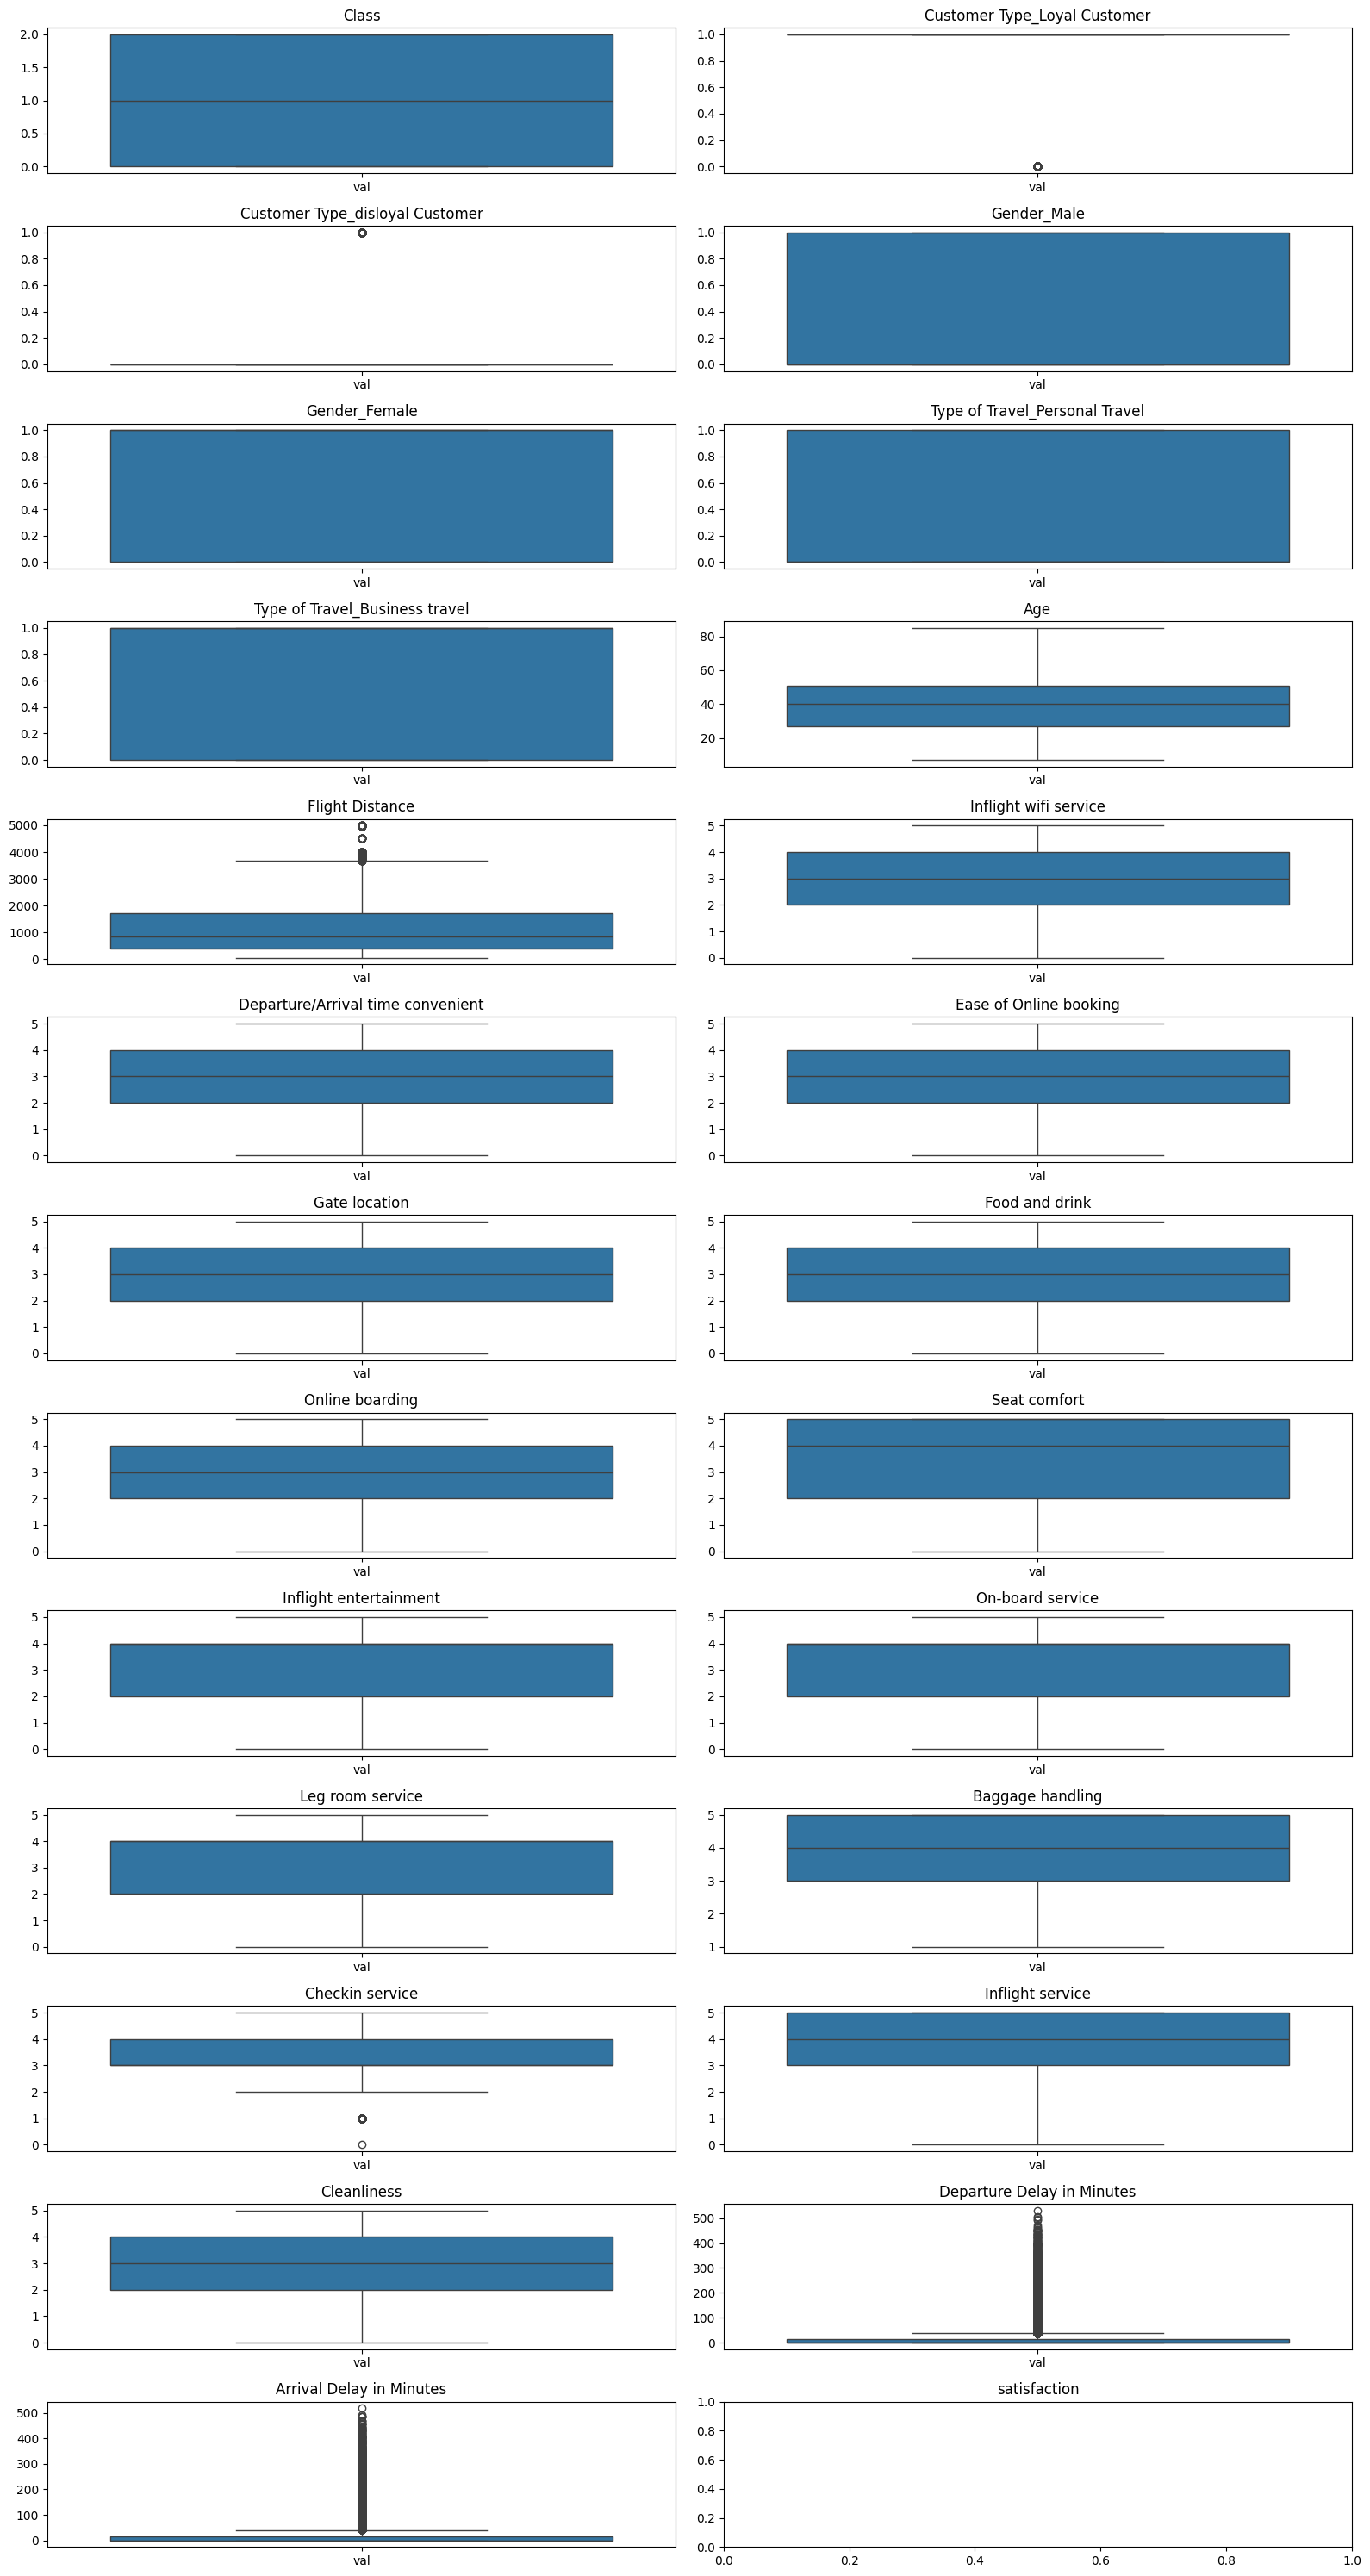

In [33]:
create_boxplot(df_clean_out)

In [41]:
from sklearn.neighbors import LocalOutlierFactor
display(df_clean_out.shape)
df_outliers = df_clean_out.loc[:, ['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Flight Distance', 'Checkin service', 'Customer Type_Loyal Customer','Customer Type_disloyal Customer']]
df_to_iso = df_clean_out.reset_index(drop=True)
iso = LocalOutlierFactor()
predict_iso = iso.fit_predict(df_outliers)
outliers = predict_iso != -1
df_to_iso_copy = df_to_iso.copy()
df_to_iso_copy['satisfaction'] = df_clean_out['satisfaction']

df_clean_out_1 = df_to_iso_copy[outliers]


df_clean_out_1 = df_clean_out_1.reset_index(drop=True)
display(df_clean_out_1.shape)

(92818, 26)

(88375, 26)

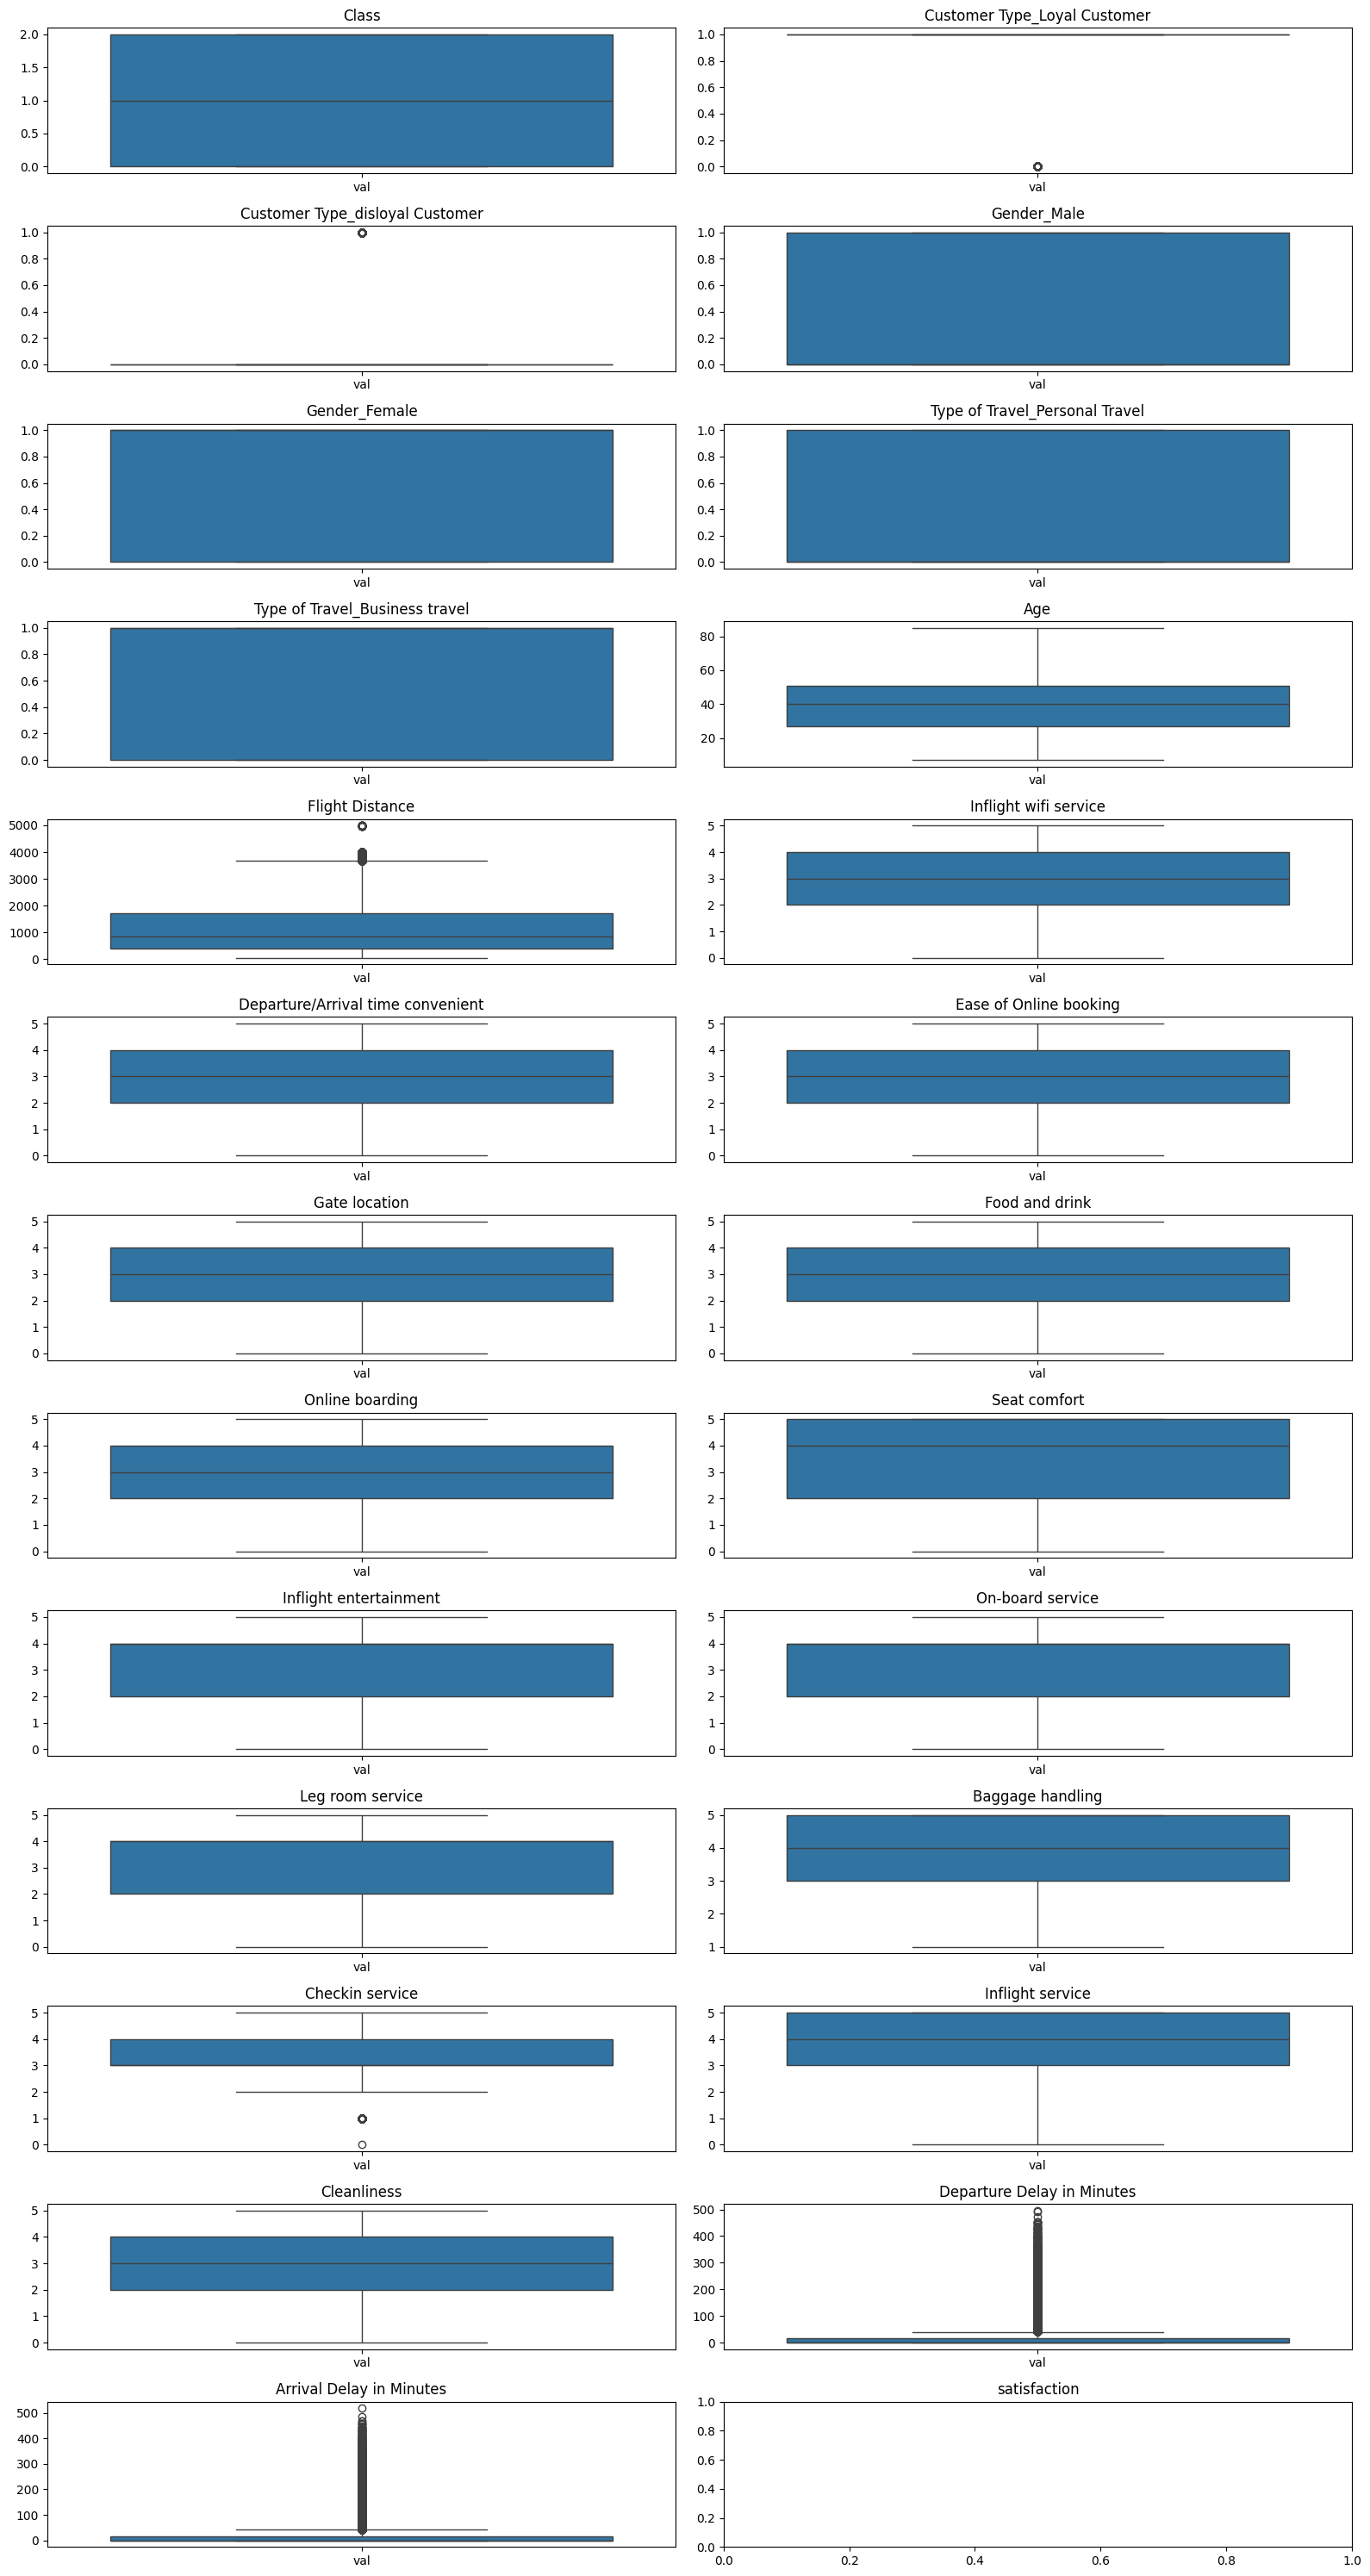

In [42]:
create_boxplot(df_clean_out_1)

In [43]:
def isolation_forest(df_to_iso):
  display(df_to_iso.shape)
  df_outliers = df_to_iso.loc[:, ['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Flight Distance', 'Checkin service', 'Customer Type_Loyal Customer','Customer Type_disloyal Customer']]
  df_to_iso = df_to_iso.reset_index(drop=True)
  iso = IsolationForest(random_state=42)
  predict_iso = iso.fit_predict(df_outliers)
  outliers = predict_iso != -1
  df_to_iso_copy = df_to_iso.copy()
  df_to_iso_copy['satisfaction'] = df_train_clean['satisfaction']

  df_clean_out = df_to_iso_copy[outliers]


  df_clean_out = df_clean_out.reset_index(drop=True)
  display(df_clean_out.shape)
  return df_clean_out

In [44]:
df_clean_out = isolation_forest(df_train_f_eng_or)

(103594, 25)

(75880, 26)

Dopo il rilevamento automatico, sono state eliminate circa 30k righe considerate outliers. In questo caso non è stato dato un limite di outliers rintracciati con il parametro contamination. Si osserva nuovamente il boxplot:

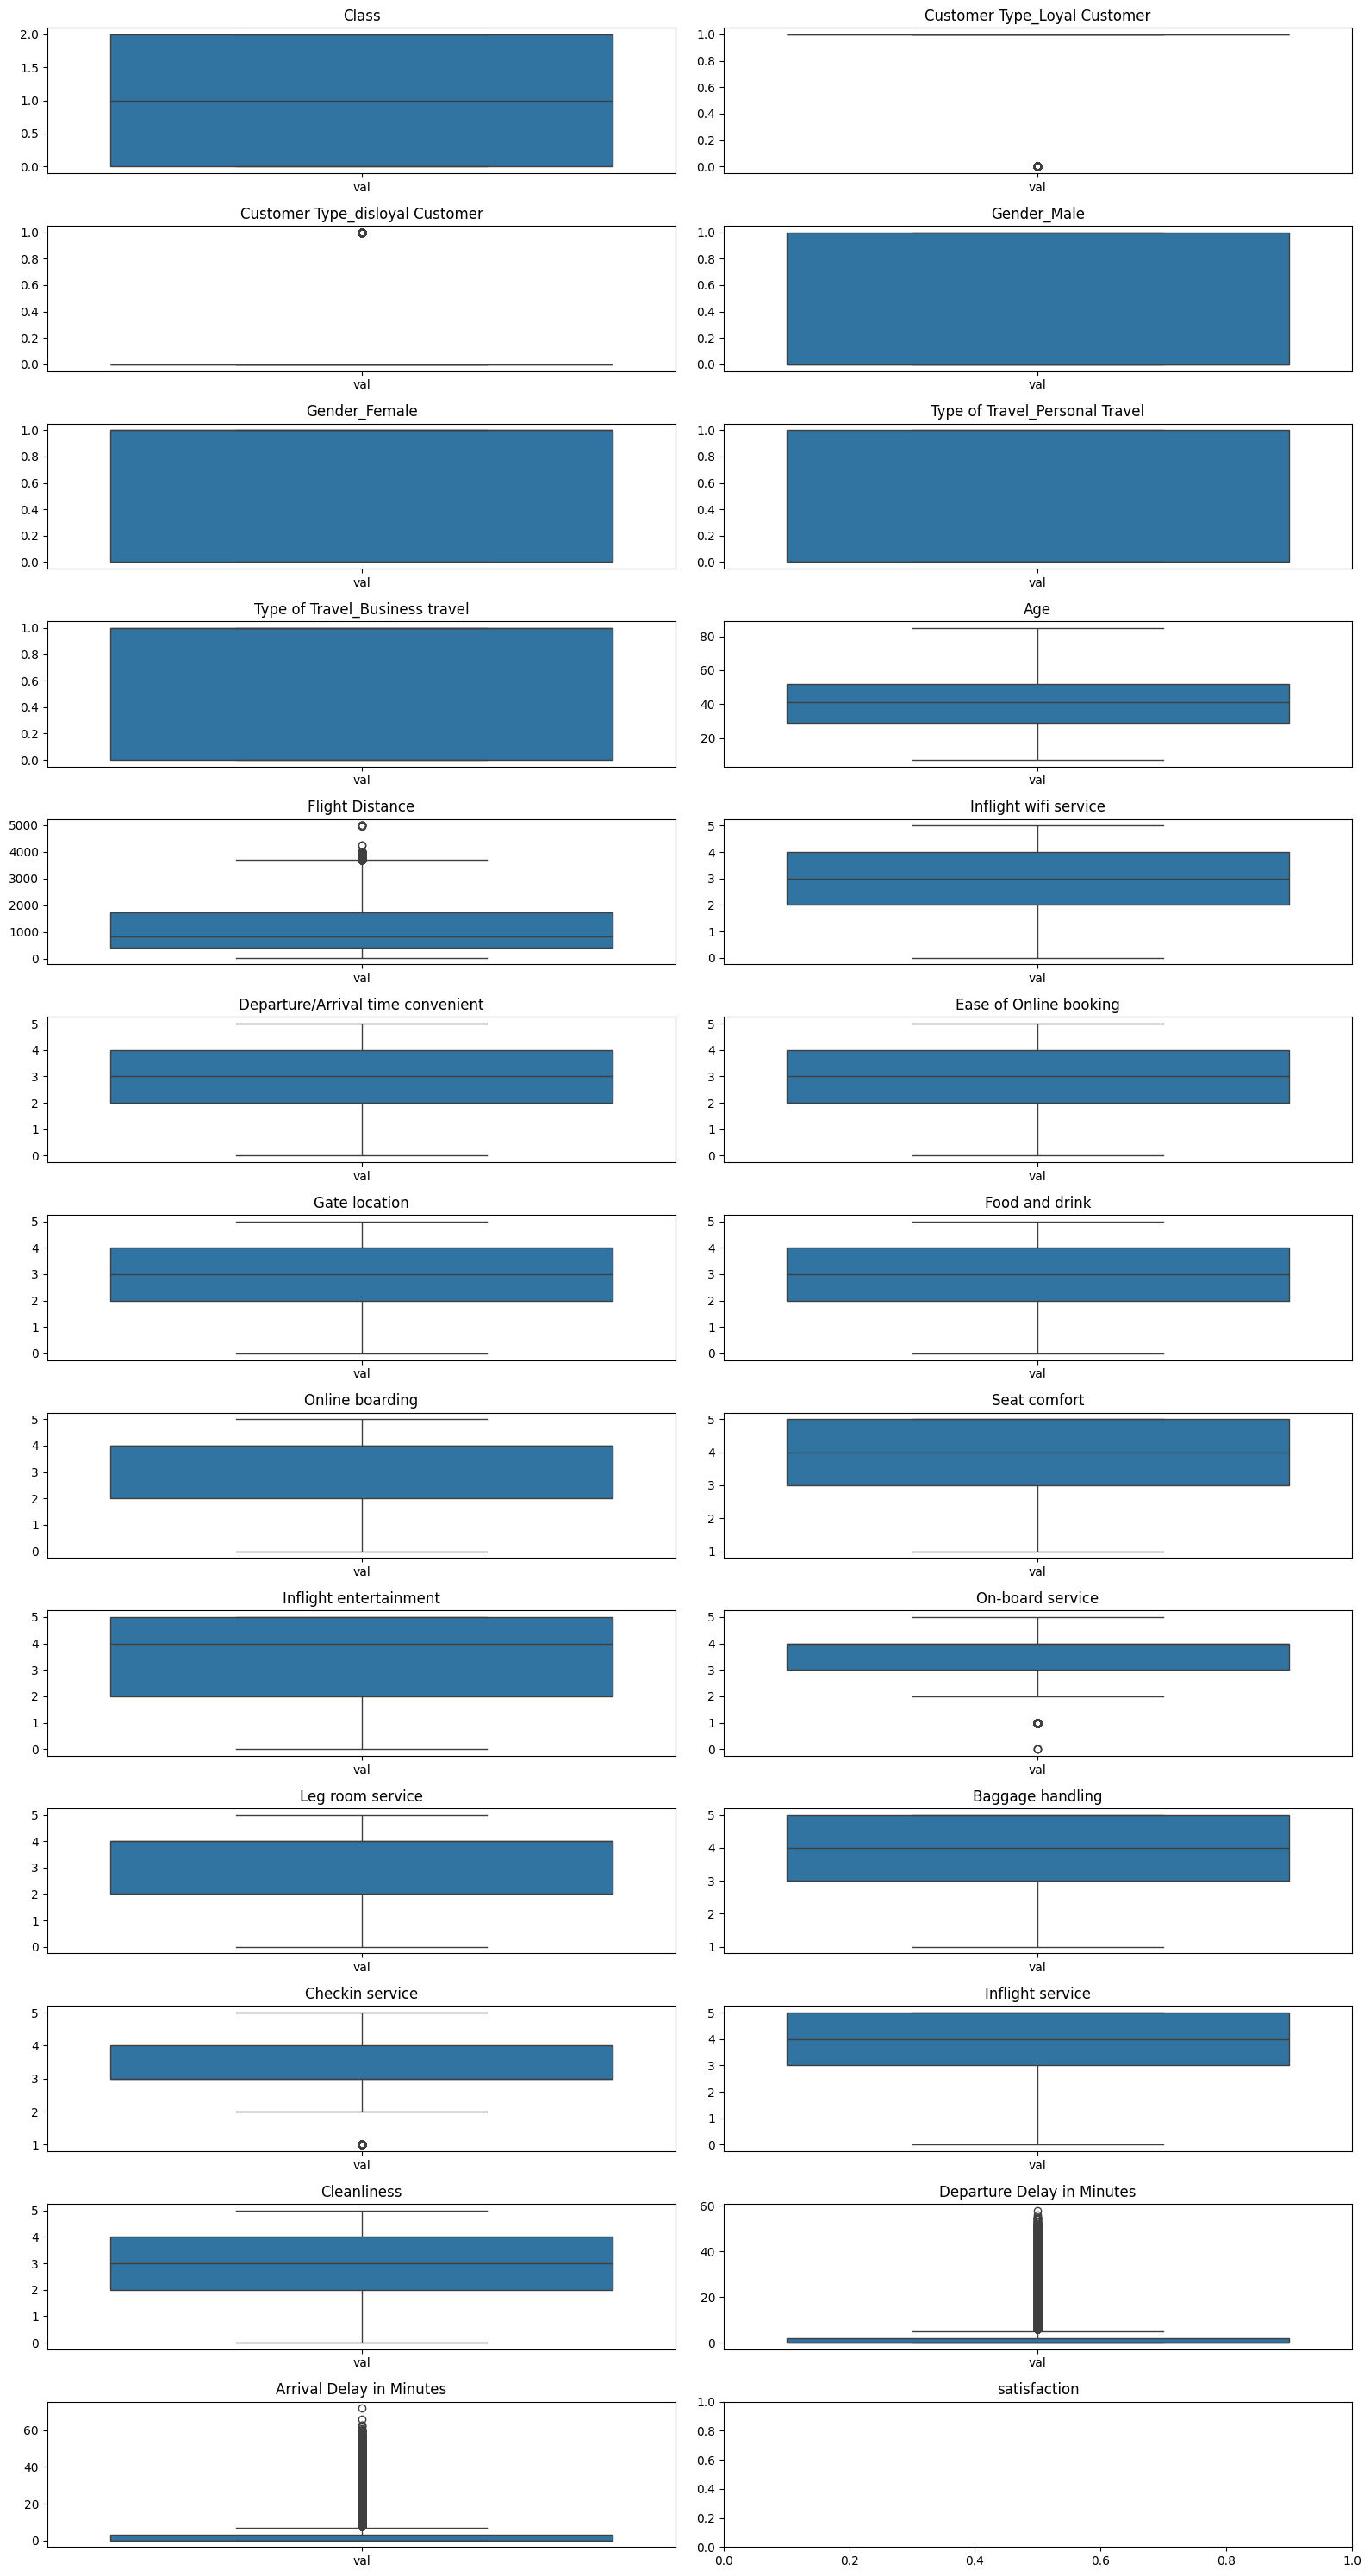

In [45]:
create_boxplot(df_clean_out)

Dopo la prima esecuzione dell'isolation forest, visualizzando i boxplot si notano la presenza di outliers. Si riesegue il codice precedente:

In [ ]:
df_clean_out_second = isolation_forest(df_clean_out)

In [ ]:
sns.countplot(df_clean_out_second, x="satisfaction")

Alla seconda esecuzione, sono stati eliminati altre 20k di righe considerate outliers. Si analizza nuovamente il boxplot:

In [ ]:
create_boxplot(df_clean_out_second)

Analizzando i boxplot, si può notare come gli outliers sono calati soprattutto nelle variabili analizzate all'inizio del

In [ ]:
df_clean_out_third = isolation_forest(df_clean_out_second)

In [ ]:
sns.countplot(df_clean_out_third, x="satisfaction")

In [ ]:
create_boxplot(df_clean_out_third)

In [ ]:
df_train_clean.describe()

In [ ]:
df_clean_out_third['Age'].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [ ]:
df_train_clean.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()